In [1]:
#загрузим данные о транзакциях
import pandas as pd

df = pd.read_csv('/home/jupyter-a.kosheleva-14/transaction_data.csv')

In [2]:
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [3]:
df.shape

(5315, 3)

In [4]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
df.describe

<bound method NDFrame.describe of                      date                name  transaction
0     2020-03-02 00:37:20   Ekaterina_Petrova    cancelled
1     2020-03-02 00:59:09      Irina_Fedorova  successfull
2     2020-03-02 01:06:14  Ekaterina_Smirnova  successfull
3     2020-03-02 00:02:58    Lolita_Polyanova    cancelled
4     2020-03-02 00:17:52      Julia_Smirnova    cancelled
...                   ...                 ...          ...
5310  2020-03-02 00:09:28   Vasilisa_Fedorova  successfull
5311  2020-03-02 00:46:31    Vasilisa_Ozerova  successfull
5312  2020-03-02 00:16:38      Olga_Polyanova  successfull
5313  2020-03-02 00:13:00  Ekaterina_Smirnova  successfull
5314  2020-03-02 01:15:45      Irina_Fedorova    cancelled

[5315 rows x 3 columns]>

In [6]:
#есть ли дубликаты
df.duplicated().sum()

0

In [7]:
#какие уникальные значения в колонке
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [8]:
#сколько значений каждого типа
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [9]:
#Сколько успешных транзакций осуществил каждый из пользователей? 
succ_trans = df.query('transaction == "successfull"') \
    .groupby('name') \
    .agg({'transaction':'count'})
succ_trans

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68
Ekaterina_Polyanova,68
Ekaterina_Smirnova,77
Irina_Fedorova,62
Irina_Ivanova,60


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


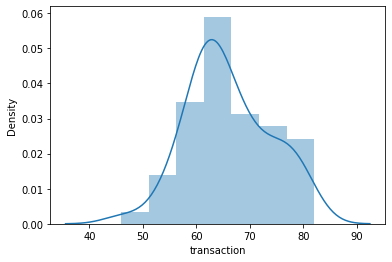

In [10]:
#нарисуем распределение
import seaborn as sns
sns.distplot(succ_trans.transaction)

In [11]:
succ_trans.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [12]:
#посмотрим на немного обновленные данные о транзакциях
transaction_data_updated = pd.read_csv('/home/jupyter-a.kosheleva-14/transaction_data_updated.csv')

In [13]:
transaction_data_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [14]:
transaction_data_updated.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [15]:
#переведем в дату
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated.date)

In [16]:
#построим сводную таблицу числа транзакций в минуту
user_vs_minute_pivot = transaction_data_updated.groupby(['name','minute'], as_index = False) \
    .agg({'transaction':'count'}) \
    .pivot(index='minute', columns='name', values='transaction').reset_index()

In [17]:
user_vs_minute_pivot

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0
5,5,3.0,NaN,2.0,3.0,1.0,NaN,5.0,3.0,1.0,...,NaN,2.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,1.0
6,6,4.0,1.0,2.0,2.0,NaN,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,NaN,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,NaN,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,NaN,3.0,2.0,1.0,1.0,...,NaN,1.0,NaN,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,NaN,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,NaN,1.0,4.0


In [18]:
# уберем NaNы
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

In [19]:
user_vs_minute_pivot

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


In [20]:
transaction_data_updated.date.dt.minute

0       37
1       59
2        6
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    15
Name: date, Length: 5315, dtype: int64

In [21]:
#кажется, в столбце "минуты" вовсе не минуты, исправим это
transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.minute + (transaction_data_updated.date.dt.hour*60)

In [22]:
transaction_data_updated

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [23]:
new_data = transaction_data_updated.groupby('true_minute', as_index = False) \
    .agg({'transaction':'count'}, axis=1)
new_data

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


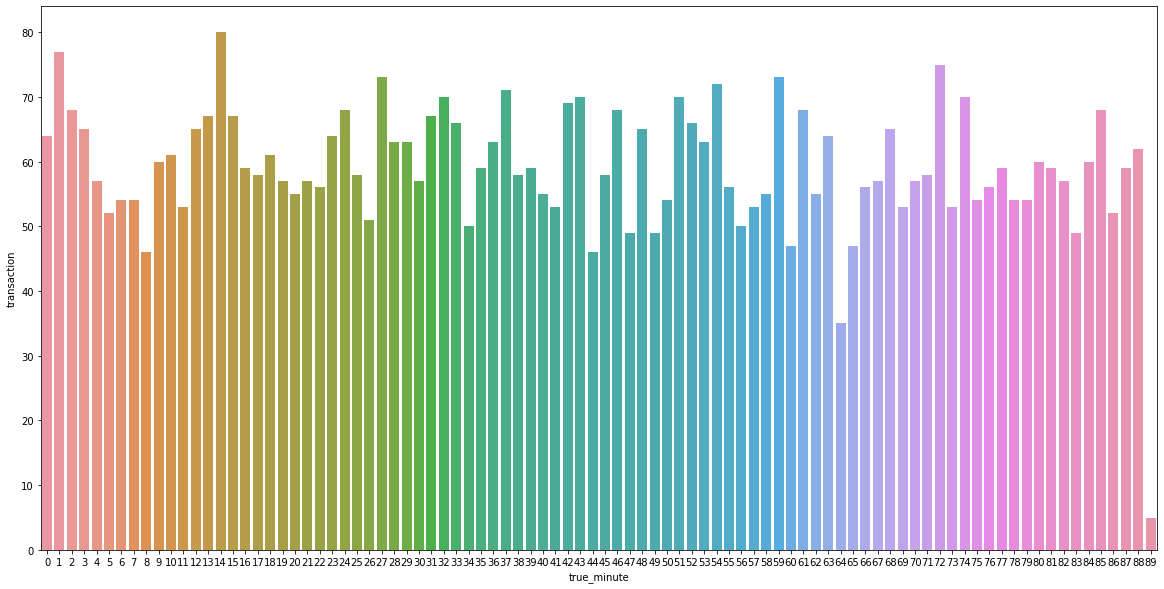

In [24]:
#и визуализируем наш результат
import matplotlib as plt
%matplotlib inline 
plt.rcParams['figure.figsize']=20,10

import seaborn as sns
sns.barplot(x='true_minute', y='transaction', data=new_data)